## Import needed libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read .csv files into variables

In [139]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Description of datasets

In [140]:
print('Training data description----------------------------------------')
print(train_data.describe())
print('\nTesting data description----------------------------------------')
print(test_data.describe())

Training data description----------------------------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Testing data d

## Datasets information

In [141]:
print('Training data information----------------------------------------')
print(train_data.info())
print('\nTesting data information----------------------------------------')
print(test_data.info())

Training data information----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Testing data information----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #

## Check for Missing Data

In [142]:
print("Training Data----------------------------------")
print(train_data.isnull().sum())
print("\nTesting Data----------------------------------")
print(test_data.isnull().sum())

Training Data----------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Testing Data----------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Combine Datasets

In [143]:
titanic_all = pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [144]:
titanic_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## Data Cleansing

## how many missing ages total?

In [145]:
print(f'Total ages missing for entire dataset: {titanic_all["Age"].isnull().sum()}')
#{round(titanic_all["Age"].isnull().sum()/len(titanic_all)*100,0)}
print(f'Percent of ages missing for entire dataset: {round(titanic_all["Age"].isnull().sum()/len(titanic_all)*100,0)}'+ '%')

Total ages missing for entire dataset: 263
Percent of ages missing for entire dataset: 20.0%


## Overall Age distributions

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

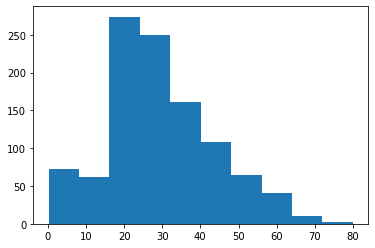

In [146]:
plt.hist(titanic_all["Age"])

## Age Distribution per class

In [147]:
class_1 = titanic_all[titanic_all['Pclass'] == 1]
class_2 = titanic_all[titanic_all['Pclass'] == 2]
class_3 = titanic_all[titanic_all['Pclass'] == 3]

Text(0.5, 1.0, 'First Class')

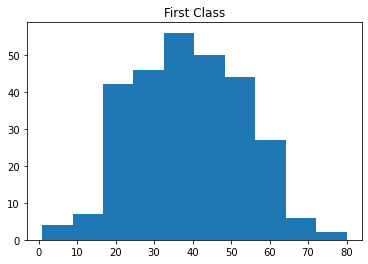

In [148]:
plt.hist(class_1["Age"])
plt.title("First Class")

Text(0.5, 1.0, 'Second Class')

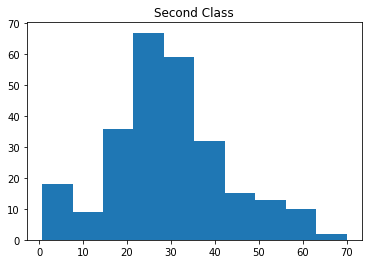

In [149]:
plt.hist(class_2["Age"])
plt.title("Second Class")

Text(0.5, 1.0, 'Third Class')

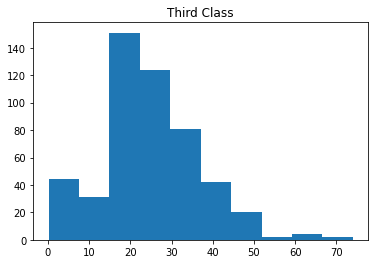

In [150]:
plt.hist(class_3["Age"])
plt.title("Third Class")

In [70]:
#sns.countplot(x='Pclass', hue='Age', data=titanic_all)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

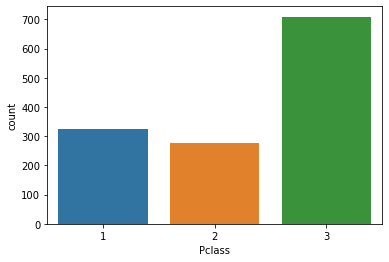

In [151]:
#Majority of passengers were Third Class
sns.countplot(x='Pclass', data=titanic_all)

## Fill missing data with median values

In [71]:
# Overall passenger age is scewed right, so will replace with median age per class
# Will do this for each dataset provided: train and test

In [152]:
print('Median age per class-------------------------------------------- ')
display(titanic_all.groupby("Pclass")["Age"].median())

Median age per class-------------------------------------------- 


Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [153]:
print('Median for Age separated by Class and Sex--------------------------------------')
display(titanic_all.groupby(["Pclass", "Sex"])["Age"].median())

Median for Age separated by Class and Sex--------------------------------------


Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [79]:
#practice_train = train_data

In [83]:
#practice_train["Age"] = practice_train.groupby(["Pclass", "Sex"])["Age"].apply(lambda x: x.fillna(x.median()))

In [85]:
#practice_train["Age"].isnull().sum()

0

## Replace missing age values in train and test data sets with median age by class and sex

In [154]:
train_data['Age'] = titanic_all.groupby(["Pclass", "Sex"])["Age"].apply(lambda x: x.fillna(x.median()))
print(f"Null Age values in train_data: {train_data['Age'].isnull().sum()}")
#---------------------------------------------------------------------------------------------------------
test_data['Age'] = titanic_all.groupby(['Pclass', "Sex"])["Age"].apply(lambda x: x.fillna(x.median()))
print(f"Null Age values in test_data: {test_data['Age'].isnull().sum()}")

Null Age values in train_data: 0
Null Age values in test_data: 0


## Fares

In [155]:
print(f"Missing Fare values in train_data: {train_data['Fare'].isnull().sum()}")
print(f"Missing Fare values in test_data: {test_data['Fare'].isnull().sum()}")
fare_miss = test_data['Fare'].isnull()

Missing Fare values in train_data: 0
Missing Fare values in test_data: 1


In [156]:
# Who is missing a the Fare data?
test_data.loc[fare_miss]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,55.5,0,0,3701,NaN,NaN,S


In [166]:
# Median fare for a 3rd class male passenger traveling alone from Southhampton
fare_filt = titanic_all.loc[(titanic_all['Pclass'] == 3) &
                            (titanic_all['Sex'] == 'male')&
                            (titanic_all['SibSp'] == 0) & 
                            (titanic_all['Parch'] == 0) & 
                            (titanic_all['Embarked'] == 'S')]['Fare'].median()
print(f"Median fare for a 3rd class male passenger traveling alone from Southhampton: ${round(fare_filt,2)}")

Median fare for a 3rd class male passenger traveling alone from Southhampton: $7.9


In [158]:
#practice---------------------------------------

In [168]:
test_practice.iloc[152, :]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          55.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                       7.8958
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [169]:
test_practice.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [170]:
# Replace Mr Thomas' fare with the median value
test_data.loc[test_data['Fare'].isnull(), 'Fare'] = fare_filt

#Verify it has been replace
test_data.iloc[152,:]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          55.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                       7.8958
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [171]:
#Verify fare has been replace
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64